## Fabryka Abstrakcyjna (ang. Abstract Factory)

**Typ**: kreacyjny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>fabryka abstrakcyjna</b> dostarcza interfejs do tworzenia rodzin powiązanych lub zależnych obiektów bez określania ich konkretnych klas.
</div>

Rodziny powiązanych ze sobą obiektów

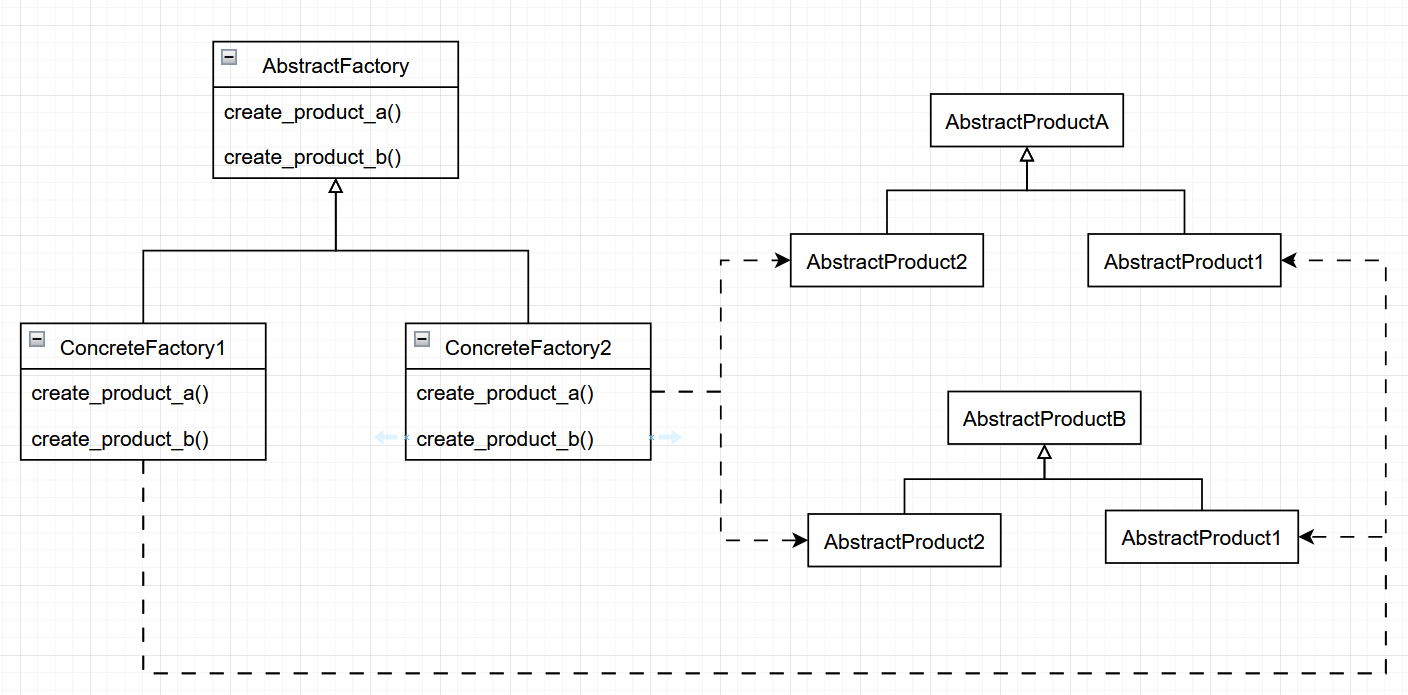

Rodziny powiązanych ze sobą obiektów razem z kontekstem

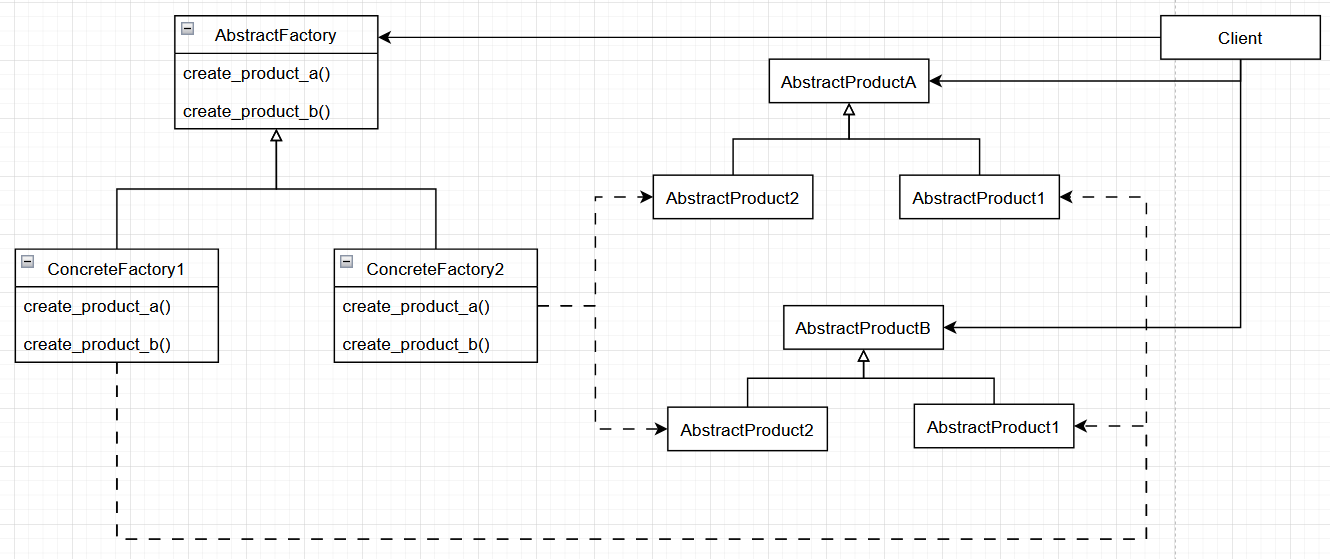

Zacznijmy od przykładu, który zilustruje problem rozwiązywany przez wzorzec.

Wyobraźmy sobie, że tworzymy aplikację, która musi działać na różnych systemach operacyjnych - Windows i macOS. Każdy system ma swój własny styl interfejsu użytkownika (przyciski, okna, checkboxy). Musimy zadbać o to, żeby wszystkie elementy interfejsu były **spójne wizualnie** dla danego systemu.

### Problem - tworzenie spójnych rodzin obiektów

In [ ]:
# Klasy dla elementów UI w Windows
class WindowsButton:
    def render(self):
        return "[Windows Button]"

class WindowsCheckbox:
    def render(self):
        return "[Windows Checkbox]"


# Klasy dla elementów UI w macOS
class MacButton:
    def render(self):
        return "(Mac Button)"

class MacCheckbox:
    def render(self):
        return "(Mac Checkbox)"

In [ ]:
# Kod aplikacji - musi wiedzieć na jakim systemie działa
import platform

os_type = "Windows"  # albo "Mac"

# Problem: kod klienta jest pełen if-ów!
if os_type == "Windows":
    button = WindowsButton()
    checkbox = WindowsCheckbox()
elif os_type == "Mac":
    button = MacButton()
    checkbox = MacCheckbox()

print(f"Renderuję: {button.render()}")
print(f"Renderuję: {checkbox.render()}")

Działa, ale jest kilka problemów:

1. **Kod klienta musi znać wszystkie konkretne klasy** - `WindowsButton`, `MacButton`, itp.
2. **Kod jest pełen instrukcji warunkowych** - każde miejsce, gdzie tworzymy UI, wymaga `if os_type == ...`
3. **Łatwo o niespójność** - możemy przypadkowo stworzyć `WindowsButton` z `MacCheckbox`
4. **Dodanie nowego systemu** (np. Linux) wymaga zmian w wielu miejscach kodu

In [ ]:
# Przykład niespójności
button = WindowsButton()      # Windows
checkbox = MacCheckbox()      # Mac - Niespójny styl!

print(f"Renderuję: {button.render()}")
print(f"Renderuję: {checkbox.render()}")
# Wynik: mieszanka stylów Windows i Mac - wygląda źle!

### Rozwiązanie - Fabryka Abstrakcyjna

Jak to rozwiązać?

Stworzymy **fabrykę**, która wie jak tworzyć **całą rodzinę** powiązanych obiektów (przyciski, checkboxy, itd.). Będziemy mieli oddzielną fabrykę dla każdego systemu operacyjnego, ale wszystkie będą implementować ten sam interfejs.

### Krok 1: Interfejsy dla produktów

In [ ]:
from abc import ABC, abstractmethod

# Interfejsy dla produktów
class Button(ABC):
    @abstractmethod
    def render(self):
        pass

class Checkbox(ABC):
    @abstractmethod
    def render(self):
        pass

### Krok 2: Konkretne implementacje produktów

In [ ]:
# Rodzina Windows
class WindowsButton(Button):
    def render(self):
        return "[Windows Button]"

class WindowsCheckbox(Checkbox):
    def render(self):
        return "[Windows Checkbox]"


# Rodzina Mac
class MacButton(Button):
    def render(self):
        return "(Mac Button)"

class MacCheckbox(Checkbox):
    def render(self):
        return "(Mac Checkbox)"

### Krok 3: Abstrakcyjna fabryka

In [ ]:
# Abstrakcyjna fabryka - interfejs
class GUIFactory(ABC):
    @abstractmethod
    def create_button(self) -> Button:
        pass
    
    @abstractmethod
    def create_checkbox(self) -> Checkbox:
        pass

### Krok 4: Konkretne fabryki dla każdego systemu

In [ ]:
# Fabryka dla Windows - tworzy tylko produkty Windows
class WindowsFactory(GUIFactory):
    def create_button(self) -> Button:
        return WindowsButton()
    
    def create_checkbox(self) -> Checkbox:
        return WindowsCheckbox()


# Fabryka dla Mac - tworzy tylko produkty Mac
class MacFactory(GUIFactory):
    def create_button(self) -> Button:
        return MacButton()
    
    def create_checkbox(self) -> Checkbox:
        return MacCheckbox()

### Krok 5: Kod klienta - prosty i niezależny od konkretnych klas!

In [ ]:
def create_ui(factory: GUIFactory):  # z definicji - bez określania ich konkretnych klas
    """Kod klienta - nie wie o konkretnych klasach!"""
    button = factory.create_button()
    checkbox = factory.create_checkbox()
    
    print(f"Renderuję: {button.render()}")
    print(f"Renderuję: {checkbox.render()}")


# Użycie - decyzja o systemie w JEDNYM miejscu
print("UI dla Windows:")
windows_factory = WindowsFactory()
create_ui(windows_factory)

print("\nUI dla Mac:")
mac_factory = MacFactory()
create_ui(mac_factory)

In [ ]:
# Użycie - decyzja o systemie w JEDNYM miejscu
print("UI dla Windows:")
windows_factory = WindowsFactory()
create_ui(windows_factory)

print("\nUI dla Mac:")
mac_factory = MacFactory()
create_ui(mac_factory)

**Zalety:**
1. **Kod klienta nie zna konkretnych klas** - pracuje tylko z interfejsami
2. **Brak instrukcji warunkowych** - nie ma `if os_type == ...`
3. **Gwarantowana spójność** - niemożliwe jest stworzenie `WindowsButton` z `MacCheckbox`
4. **Łatwe dodanie nowego systemu** - wystarczy nowa fabryka, kod klienta się nie zmienia

### Dodajemy nowy system - Linux

In [ ]:
# Nowe produkty Linux
class LinuxButton(Button):
    def render(self):
        return "<Linux Button>"

class LinuxCheckbox(Checkbox):
    def render(self):
        return "<Linux Checkbox>"


# Nowa fabryka Linux
class LinuxFactory(GUIFactory):
    def create_button(self) -> Button:
        return LinuxButton()
    
    def create_checkbox(self) -> Checkbox:
        return LinuxCheckbox()


# Kod klienta NIE ZMIENIA SIĘ!
print("UI dla Linux:")
linux_factory = LinuxFactory()
create_ui(linux_factory)  # Ta sama funkcja!

### Pełny przykład - aplikacja z wieloma komponentami

In [ ]:
from abc import ABC, abstractmethod

# ════════════════════════════════════════════════════════════
# Interfejsy produktów
# ════════════════════════════════════════════════════════════
class Button(ABC):
    @abstractmethod
    def render(self):
        pass
    
    @abstractmethod
    def click(self):
        pass

class Checkbox(ABC):
    @abstractmethod
    def render(self):
        pass
    
    @abstractmethod
    def toggle(self):
        pass

class Window(ABC):
    @abstractmethod
    def render(self):
        pass


# ════════════════════════════════════════════════════════════
# Rodzina Windows
# ════════════════════════════════════════════════════════════
class WindowsButton(Button):
    def render(self):
        return "[Windows Button]"
    
    def click(self):
        return "Windows button clicked!"

class WindowsCheckbox(Checkbox):
    def __init__(self):
        self.checked = False
    
    def render(self):
        state = "☑" if self.checked else "☐"
        return f"[{state} Windows Checkbox]"
    
    def toggle(self):
        self.checked = not self.checked
        return f"Windows checkbox: {self.checked}"

class WindowsWindow(Window):
    def render(self):
        return "┌─ Windows Window ─┐"


# ════════════════════════════════════════════════════════════
# Rodzina Mac
# ════════════════════════════════════════════════════════════
class MacButton(Button):
    def render(self):
        return "(Mac Button)"
    
    def click(self):
        return "Mac button clicked!"

class MacCheckbox(Checkbox):
    def __init__(self):
        self.checked = False
    
    def render(self):
        state = "✓" if self.checked else "○"
        return f"({state} Mac Checkbox)"
    
    def toggle(self):
        self.checked = not self.checked
        return f"Mac checkbox: {self.checked}"

class MacWindow(Window):
    def render(self):
        return "╭─ Mac Window ─╮"


# ════════════════════════════════════════════════════════════
# Abstrakcyjna fabryka
# ════════════════════════════════════════════════════════════
class GUIFactory(ABC):
    @abstractmethod
    def create_button(self) -> Button:
        pass
    
    @abstractmethod
    def create_checkbox(self) -> Checkbox:
        pass
    
    @abstractmethod
    def create_window(self) -> Window:
        pass


# ════════════════════════════════════════════════════════════
# Konkretne fabryki
# ════════════════════════════════════════════════════════════
class WindowsFactory(GUIFactory):
    def create_button(self) -> Button:
        return WindowsButton()
    
    def create_checkbox(self) -> Checkbox:
        return WindowsCheckbox()
    
    def create_window(self) -> Window:
        return WindowsWindow()

class MacFactory(GUIFactory):
    def create_button(self) -> Button:
        return MacButton()
    
    def create_checkbox(self) -> Checkbox:
        return MacCheckbox()
    
    def create_window(self) -> Window:
        return MacWindow()

In [ ]:
# ════════════════════════════════════════════════════════════
# Aplikacja - kod klienta
# ════════════════════════════════════════════════════════════
class Application:
    def __init__(self, factory: GUIFactory):
        self.factory = factory
    
    def create_ui(self):
        """Tworzy cały interfejs użytkownika"""
        window = self.factory.create_window()
        button = self.factory.create_button()
        checkbox = self.factory.create_checkbox()
        
        print(window.render())
        print(f"  {button.render()}")
        print(f"  {checkbox.render()}")
        print()
        
        # Interakcja
        print(f"  {button.click()}")
        print(f"  {checkbox.toggle()}")
        print(f"  {checkbox.render()}")


# Użycie
print("Aplikacja na Windows:")
app_windows = Application(WindowsFactory())
app_windows.create_ui()

print("\nAplikacja na Mac:")
app_mac = Application(MacFactory())
app_mac.create_ui()

### Kluczowe elementy wzorca

1. **AbstractFactory** (`GUIFactory`) - interfejs deklarujący metody do tworzenia produktów
2. **ConcreteFactory** (`WindowsFactory`, `MacFactory`) - implementują metody tworzące konkretne produkty
3. **AbstractProduct** (`Button`, `Checkbox`) - interfejsy dla rodzin produktów
4. **ConcreteProduct** (`WindowsButton`, `MacButton`) - konkretne implementacje produktów
5. **Client** (`Application`) - używa tylko interfejsów, nie zna konkretnych klas

### Różnica: Fabryka Abstrakcyjna vs Metoda Wytwórcza

To są dwa różne wzorce kreacyjne, często mylone!

**Metoda Wytwórcza (Factory Method):**
- Tworzy **JEDEN** typ produktu
- Używa dziedziczenia (podklasy decydują)
- Przykład: różne typy przycisków

**Fabryka Abstrakcyjna (Abstract Factory):**
- Tworzy **RODZINĘ** powiązanych produktów
- Używa kompozycji/zależności (obiekt fabryki)
- Przykład: przyciski + checkboxy + okna (całe UI)

In [ ]:
# ════════════════════════════════════════════════════════════
# Factory Method - tworzy JEDEN produkt
# ════════════════════════════════════════════════════════════
class Dialog(ABC):
    @abstractmethod
    def create_button(self) -> Button:  # Jedna metoda fabrykująca
        pass
    
    def render(self):
        button = self.create_button()  # Używa metody fabrykującej
        print(button.render())

class WindowsDialog(Dialog):
    def create_button(self) -> Button:
        return WindowsButton()

class MacDialog(Dialog):
    def create_button(self) -> Button:
        return MacButton()


# ════════════════════════════════════════════════════════════
# Abstract Factory - tworzy RODZINĘ produktów
# ════════════════════════════════════════════════════════════
class GUIFactory(ABC):
    @abstractmethod
    def create_button(self) -> Button:  # Wiele metod
        pass
    
    @abstractmethod
    def create_checkbox(self) -> Checkbox:  # dla rodziny
        pass
    
    @abstractmethod
    def create_window(self) -> Window:  # produktów
        pass

| Cecha | Factory Method | Abstract Factory |
|-------|----------------|------------------|
| **Cel** | Tworzy jeden typ produktu | Tworzy rodzinę produktów |
| **Struktura** | Dziedziczenie (jedna metoda) | Kompozycja/Zależność (obiekt fabryki) |
| **Metod tworzących** | Jedna | Wiele (po jednej na produkt) |
| **Przykład** | `create_button()` | `create_button()`, `create_checkbox()`, `create_window()` |
| **Kiedy użyć** | Jeden produkt, wiele wariantów | Wiele powiązanych produktów |
| **Spójność** | Nie gwarantuje | Gwarantuje spójność rodziny |

### Kiedy używać Fabryki Abstrakcyjnej?

Wzorzec Fabryka Abstrakcyjna jest przydatny gdy:

1. **System musi być niezależny od sposobu tworzenia produktów** - kod klienta nie wie o konkretnych klasach
2. **Produkty są ze sobą powiązane i muszą być używane razem** - np. wszystkie elementy UI muszą mieć ten sam styl
3. **Chcesz zapewnić spójność rodziny obiektów** - nie można pomylić `WindowsButton` z `MacCheckbox`
4. **Masz wiele wariantów rodzin produktów** - Windows/Mac/Linux, Ciemny/Jasny motyw, itp.
5. **Chcesz łatwo dodawać nowe rodziny** - bez zmiany istniejącego kodu

**Przykłady użycia:**
- **Interfejsy użytkownika** - różne style dla różnych platform
- **Bazy danych** - różne implementacje dla MySQL/PostgreSQL/MongoDB
- **Eksport dokumentów** - HTML/PDF/Markdown (nagłówki, akapity, listy muszą być spójne)
- **Gry** - różne poziomy trudności (łatwe/trudne potwory, przedmioty, pułapki)

### Podsumowanie

Wzorzec Fabryka Abstrakcyjna:
- **Izoluje** kod klienta od konkretnych klas produktów
- **Gwarantuje spójność** rodziny obiektów
- **Ułatwia** dodawanie nowych rodzin produktów
- **Zmniejsza zależności** między kodem klienta a konkretnymi implementacjami
- **Zwiększa złożoność** - wymaga wielu interfejsów i klas
- **Trudne rozszerzanie** o nowe typy produktów (wymaga zmian w interfejsie fabryki)

**Kluczowe elementy:**
1. **AbstractFactory** - interfejs z metodami tworzącymi produkty
2. **ConcreteFactory** - implementuje metody dla konkretnej rodziny
3. **AbstractProduct** - interfejsy dla każdego typu produktu
4. **ConcreteProduct** - konkretne implementacje produktów
5. **Client** - używa tylko abstrakcji, nie wie o konkretnych klasach

**Zapamiętaj:**
- Factory Method = **jeden** produkt, wiele wariantów
- Abstract Factory = **rodzina** produktów, wiele wariantów rodzin